### Цели и задачи проекта

*Цель проекта* - проанализировать данные об успеваемости по математике и выявить зависитость результатов экзаменов по математике от условий жизни. Будут выявляться линейные зависимости между количественными полями посредством кореляционного анализа и будет выполнен поиск номинативных параметров со статистическими разностями в распределении.<br>
*Задачи проекта* - подготовить данные для анализа: заполнить пустые значения, очистить данные от строк свыбросами в числовых столбцах.


### Коротко о данных

В наборе данных присутствует 395 строк, 30 столбцов из которых 17 типа object и 13 числовых.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок


def init_data():
    """Инициализация начального датафрейма - первичная загрузка из файла и переименовывание столбца"""

    # считываем файл с даггыми
    stud_math = pd.read_csv(
        'C:/Users/User/Documents/DataScientist/Module 11/Final work/stud_math.csv')

    # переименовываем столбец
    stud_math.rename(
        columns={'studytime, granular': 'studytime_granular'}, inplace=True)

    return stud_math


stud_math = init_data()

# запоминаем количество строк
initial_data_length = len(stud_math)

## 1. Первичный обзор данных после их загрузки

In [61]:
# первичный просмотр данных
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

### Вспомогательные функции

In [65]:
def show_field_info(stud_math, col):
    """функция отображает информацию о столбце любого типа"""
    # отображаем название и тип столбца
    print("Column name:", col, "Type:", stud_math[col].dtype)

    # отображаем уникальные значения
    print(stud_math[col].unique())

    # показываем непустые уникальные значения и количества значений
    display(stud_math[col].value_counts())

    if stud_math[col].dtype == 'object':
        # меняем на None пустые строки в полях типа object
        stud_math[col] = stud_math[col].apply(
            lambda x: None if str(x).strip() == '' else x)

    # подсчитываем количество строк с пустыми значениями поля
    rows_with_empty_value = len(stud_math[pd.isnull(stud_math[col])])

    if rows_with_empty_value > 0:
        # отображаем количество строк с пустыми значениями поля
        print("Rows with empty values:", rows_with_empty_value)

    # присваиваем количество строк с пустыми значениями поля
    result = rows_with_empty_value

    if stud_math[col].dtype in ['int64', 'float64']:
        # возвращаем значение функции
        result = show_num_field_info(stud_math, col)

    # отображаем разделительную строку
    print('------------------------------------------')

    # возвращаем количество строк с пусьыми значениями поля или
    # Tuple с количеством строк с значением выбросов и набор данных
    # с отфильтрованными от выбросов строками
    return result


def show_num_field_info(stud_math, col):
    """Функция отображает информацию о числовом поле"""
    # инициализируется список с названиями неколичественных полей
    no_outliers_calc = ['Medu', 'Fedu', 'traveltime', 'studytime',
                        'studytime_granular', 'failures', 'famrel', 'freetime', 'goout', 'health']

    # отображаем название столбца
    print("Column name:", col, "Type:", stud_math[col].dtype)

    # возвращаем информацию о поле: среднее, минимальное и максимальное, стандартное отклонение
    # и квантили
    display(stud_math[col].describe())

    # отфильтровываются строки с пустыми знаяениями
    stud_math = stud_math.loc[pd.notna(stud_math[col])]

    # инициализируется переменная для хранения количества строк с выбросами
    rows_with_outliers_count = -1

    if col not in no_outliers_calc:
        # подсчитываем выбросы
        perc25 = stud_math[col].quantile(0.25)
        perc75 = stud_math[col].quantile(0.75)
        IQR = perc75 - perc25

        # отображаем границы выбросов
        if IQR > 0:
            print(
                '25-й перцентиль: {},'.format(perc25),
                '75-й перцентиль: {},'.format(perc75),
                "IQR: {}, ".format(IQR),
                "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

        # подсчитываем границы
        rows_with_outliers_count = len(stud_math.loc[(
            stud_math[col] < perc25 - 1.5*IQR) | (stud_math[col] > (perc75 + 1.5*IQR))])

        # отображаем количество строк с выбросами
        print('Rows with outliers:', rows_with_outliers_count)

        # фильтруем строки с выбросами
        stud_math[col] = stud_math[col].loc[stud_math[col].between(
            perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

    # возвращаем количество строк с выбросами
    return (rows_with_outliers_count, stud_math)


def get_stat_dif(stud_math, column, value=0.05):
    """функция для поиска статистических различий посредством теста Стбюдента"""

    # выбираем столбцы
    cols = stud_math.loc[:, column].value_counts()

    # генерируем комбинации по два значения
    combinations_all = list(combinations(cols, 2))

    for comb in combinations_all:
        # перебираем комбинации и делаем тест Стьюдента
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= value/len(combinations_all):  # Учли поправку Бонферони
            # показываем поле для которого найдены значимве различия
            print('Найдены статистически значимые различия для колонки', column)
            break  # прерываем цикл

## 2. Обзор столбцов

In [66]:
# список с названиями полей и количествами строк с пустых значениями
rows_with_empty_values_counts = []

# список с названиями полей и количествами строк с выбросами
rows_with_outliers_counts = []

for col in stud_math.columns:
    # перебираем названия полей
    if stud_math[col].dtype == 'object':
        rows_with_empty_value_count = show_field_info(stud_math, col)

        if rows_with_empty_value_count > 0:
            # записываем поле с количеством строк с пустыми значениями
            rows_with_empty_values_counts.append(rows_with_empty_value_count)
    elif stud_math[col].dtype in ['int64', 'float64']:
        outliers_data = show_field_info(stud_math, col)

        # присваиваем отфильтрованные данные
        stud_math = outliers_data[1]

        if outliers_data[0] > 0:
            # запоминаем количество строк с выбросами поля
            rows_with_outliers_counts.append(outliers_data[0])


if len(rows_with_empty_values_counts) > 0 or len(rows_with_outliers_counts):
    # создаём новый датафрейм
    df = pd.DataFrame(
        {'rows_with_empty_values': rows_with_empty_values_counts})
    display(df.describe())

    df = pd.DataFrame({'rows_with_outliers': rows_with_outliers_counts})
    display(df.describe())

# Show current rows count in dataframe after outliers and empty values removal
print("Количество строк после фильтрации строк с выбросами или пустыми значениями:", len(
    stud_math), round(len(stud_math) / initial_data_length, 2) * 100)

Column name: school Type: object
['GP' 'MS']


GP    349
MS     46
Name: school, dtype: int64

------------------------------------------
Column name: sex Type: object
['F' 'M']


F    208
M    187
Name: sex, dtype: int64

------------------------------------------
Column name: age Type: int64
[18 17 15 16 19 22 20 21]


16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

Column name: age Type: int64


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].
Rows with outliers: 1
------------------------------------------
Column name: address Type: object
['U' nan 'R']


U    295
R     83
Name: address, dtype: int64

Rows with empty values: 17
------------------------------------------
Column name: famsize Type: object
[nan 'GT3' 'LE3']


GT3    261
LE3    107
Name: famsize, dtype: int64

Rows with empty values: 27
------------------------------------------
Column name: Pstatus Type: object
['A' nan 'T']


T    314
A     36
Name: Pstatus, dtype: int64

Rows with empty values: 45
------------------------------------------
Column name: Medu Type: float64
[ 4.  1.  3.  2. nan  0.]


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Rows with empty values: 3
Column name: Medu Type: float64


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

------------------------------------------
Column name: Fedu Type: float64
[ 4.  1.  2.  3. 40. nan  0.]


2.0     105
3.0      95
4.0      88
1.0      77
0.0       2
40.0      1
Name: Fedu, dtype: int64

Rows with empty values: 24
Column name: Fedu Type: float64


count    368.000000
mean       2.619565
std        2.235909
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

------------------------------------------
Column name: Mjob Type: object
['at_home' 'health' 'other' 'services' 'teacher' nan]


other       123
services     90
at_home      57
teacher      48
health       31
Name: Mjob, dtype: int64

Rows with empty values: 19
------------------------------------------
Column name: Fjob Type: object
['teacher' 'other' nan 'health' 'services' 'at_home']


other       189
services     92
teacher      26
at_home      14
health       13
Name: Fjob, dtype: int64

Rows with empty values: 34
------------------------------------------
Column name: reason Type: object
['course' 'other' 'home' 'reputation' nan]


course        128
reputation     97
home           95
other          32
Name: reason, dtype: int64

Rows with empty values: 16
------------------------------------------
Column name: guardian Type: object
['mother' 'father' 'other' nan]


mother    235
father     77
other      26
Name: guardian, dtype: int64

Rows with empty values: 30
------------------------------------------
Column name: traveltime Type: float64
[ 2.  1.  3. nan  4.]


1.0    222
2.0     92
3.0     22
4.0      7
Name: traveltime, dtype: int64

Rows with empty values: 25
Column name: traveltime Type: float64


count    343.000000
mean       1.457726
std        0.707390
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

------------------------------------------
Column name: studytime Type: float64
[ 2.  3.  1. nan  4.]


2.0    167
1.0     91
3.0     55
4.0     24
Name: studytime, dtype: int64

Rows with empty values: 6
Column name: studytime Type: float64


count    337.000000
mean       2.035608
std        0.847919
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

------------------------------------------
Column name: failures Type: float64
[ 0.  3.  2.  1. nan]


0.0    254
1.0     41
3.0     14
2.0     12
Name: failures, dtype: int64

Rows with empty values: 16
Column name: failures Type: float64


count    321.000000
mean       0.333333
std        0.748610
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

------------------------------------------
Column name: schoolsup Type: object
['yes' 'no' nan]


no     271
yes     42
Name: schoolsup, dtype: int64

Rows with empty values: 8
------------------------------------------
Column name: famsup Type: object
['no' 'yes' nan]


yes    176
no     115
Name: famsup, dtype: int64

Rows with empty values: 30
------------------------------------------
Column name: paid Type: object
['no' nan 'yes']


no     164
yes    126
Name: paid, dtype: int64

Rows with empty values: 31
------------------------------------------
Column name: activities Type: object
['no' 'yes' nan]


yes    158
no     151
Name: activities, dtype: int64

Rows with empty values: 12
------------------------------------------
Column name: nursery Type: object
['yes' 'no' nan]


yes    241
no      64
Name: nursery, dtype: int64

Rows with empty values: 16
------------------------------------------
Column name: studytime_granular Type: float64
[ -6.  -9.  -3. -12.]


-6.0     161
-3.0      85
-9.0      53
-12.0     22
Name: studytime_granular, dtype: int64

Column name: studytime_granular Type: float64


count    321.000000
mean      -6.112150
std        2.518657
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

------------------------------------------
Column name: higher Type: object
['yes' nan 'no']


yes    293
no      16
Name: higher, dtype: int64

Rows with empty values: 12
------------------------------------------
Column name: internet Type: object
[nan 'yes' 'no']


yes    251
no      44
Name: internet, dtype: int64

Rows with empty values: 26
------------------------------------------
Column name: romantic Type: object
['no' nan 'yes']


no     199
yes    103
Name: romantic, dtype: int64

Rows with empty values: 19
------------------------------------------
Column name: famrel Type: float64
[ 4.  5.  3. nan -1.  2.  1.]


 4.0    153
 5.0     75
 3.0     50
 2.0     15
 1.0      5
-1.0      1
Name: famrel, dtype: int64

Rows with empty values: 22
Column name: famrel Type: float64


count    299.000000
mean       3.916388
std        0.921244
min       -1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

------------------------------------------
Column name: freetime Type: float64
[ 3.  2.  4.  1.  5. nan]


3.0    116
4.0     84
2.0     49
5.0     28
1.0     14
Name: freetime, dtype: int64

Rows with empty values: 8
Column name: freetime Type: float64


count    291.000000
mean       3.216495
std        0.995439
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

------------------------------------------
Column name: goout Type: float64
[ 4.  3.  2.  1.  5. nan]


3.0    100
2.0     71
4.0     62
5.0     37
1.0     15
Name: goout, dtype: int64

Rows with empty values: 6
Column name: goout Type: float64


count    285.000000
mean       3.122807
std        1.088839
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

------------------------------------------
Column name: health Type: float64
[ 3.  5.  1.  2.  4. nan]


5.0    87
3.0    69
4.0    49
2.0    35
1.0    35
Name: health, dtype: int64

Rows with empty values: 10
Column name: health Type: float64


count    275.000000
mean       3.429091
std        1.379420
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

------------------------------------------
Column name: absences Type: float64
[  6.   4.  10.   2.   0.  16.  nan  14.   8.  25.  12.  26.  18.  56.
  24.  28.   5.  13.  15.  22.   3. 385.  20.  21.   1.   9.  38.  40.
   7.  17. 212.]


0.0      78
4.0      41
2.0      38
6.0      19
8.0      17
10.0     12
12.0      8
14.0      8
16.0      7
3.0       6
5.0       4
7.0       3
1.0       2
22.0      2
9.0       2
18.0      2
15.0      2
20.0      2
28.0      1
38.0      1
212.0     1
21.0      1
40.0      1
26.0      1
13.0      1
385.0     1
25.0      1
24.0      1
56.0      1
17.0      1
Name: absences, dtype: int64

Rows with empty values: 10
Column name: absences Type: float64


count    265.000000
mean       7.713208
std       27.439065
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].
Rows with outliers: 12
------------------------------------------
Column name: score Type: float64
[ 30.  50.  75.  55.  45.  60.  80.  70.  25.  40.  85.  90.  65. 100.
  35.  95.   0.  20.  nan]


<ipython-input-65-54d7d8023e6e>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math[col] = stud_math[col].loc[stud_math[col].between(


50.0     37
55.0     34
0.0      23
70.0     22
60.0     22
40.0     22
65.0     21
45.0     19
75.0     19
80.0     11
30.0     10
90.0      7
35.0      6
25.0      4
95.0      2
85.0      2
20.0      1
100.0     1
Name: score, dtype: int64

Rows with empty values: 2
Column name: score Type: float64


count    263.000000
mean      52.110266
std       21.956220
min        0.000000
25%       42.500000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

25-й перцентиль: 42.5, 75-й перцентиль: 65.0, IQR: 22.5,  Границы выбросов: [8.75, 98.75].
Rows with outliers: 24
------------------------------------------


<ipython-input-65-54d7d8023e6e>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math[col] = stud_math[col].loc[stud_math[col].between(


,rows_with_empty_values
count,15.000000
mean,22.800000
std,10.086766
min,8.000000
25%,16.000000
50%,19.000000
75%,30.000000
max,45.000000


,rows_with_outliers
count,3.000000
mean,12.333333
std,11.503623
min,1.000000
25%,6.500000
50%,12.000000
75%,18.000000
max,24.000000


Количество строк после фильтрации строк с выбросами или пустыми значениями: 263 67.0


### Выводы о полях

*school* - Во всех строках присутсвуют значения. Уникальных значений 2. Больше всего значений "GP".<br>
*sex* - Во всех строках присутсвуют значения. Уникальных значений 2. Количество каждых значений примерно одинаково. Количество значений "F" не намного превышает значения "M".<br>
*age* - Во всех строках присутсвуют значения. Присутствует одна строка с выбросом (значение 22).<br>
*address* - В наборе данных присутствует 17 строк с пустым значением этого поля. Уникальных значений 2. Больше всего значений "U".<br>
*famsize* - В наборе данных присутствует 27 строк с пустым значением этого поля. Уникальных значений 2. Больше всего значений "GT3".<br>
*Pstatus* - В наборе данных присутствует 45 строк с пустым значением этого поля. Уникальных значений 2. Больше всего значений "T".<br>
*Medu* - В наборе данных присутствует 3 строки с пустым значением этого поля. Программа считала выбросы, но так как в поле числовые коды, а не количество чего-то, поэтому высчитывание выбросов не имеет смысла.<br>
*Fedu* - В наборе данных присутствует 24 строки с пустым значением этого поля. Программа считала выбросы, но так как в поле числовые коды, а не количество чего-то, поэтому высчитывание выбросов не имеет смысла. Присутствует значение (40) заметно превышающее в задании описанные значения. Такое значение можно трактовать как ошибку и вписать значение 4.<br>
*Mjob* - В наборе данных присутствует 19 строк с пустым значением этого поля. Уникальных значений 5. Больше всего значений "other".<br>
*Fjob* - В наборе данных присутствует 34 строки с пустым значением этого поля. Уникальных значений 5. Больше всего значений "other".<br>
*reason* - В наборе данных присутствует 16 строк с пустым значением этого поля. Уникальных значений 4. Больше всего значений "course".<br>
*guardian* - В наборе данных присутствует 30 строк с пустым значением этого поля. Уникальных значений 3. Больше всего значений "mother".<br>
*traveltime* - В наборе данных присутствует 25 строк с пустым значением этого поля. Программа считала выбросы, но так как в поле числовые коды, а не количество чего-то, поэтому высчитывание выбросов не имеет смысла. Программа удалила 7 строк с выбросами. Позже они будут восстановлены.<br>
*studytime* - В наборе данных присутствует 6 строк с пустым значением этого поля. Программа считала выбросы, но так как в поле числовые коды, а не количество чего-то, поэтому высчитывание выбросов не имеет смысла. Программа удалила 24 строк с выбросами. Позже они будут восстановлены.<br>
*failures* - В наборе данных присутствует 16 строк с пустым значением этого поля. Программа считала выбросы, но так как в поле числовые коды, а не количество чего-то, поэтому высчитывание выбросов не имеет смысла. Программа удалила 67 строк с выбросами. Позже они будут восстановлены.<br>
*schoolsup* - В наборе данных присутствует 8 строки с пустым значением этого поля. Уникальных значений 2. Больше всего значений "no".<br>
*famsup* - В наборе данных присутствует 30 строки с пустым значением этого поля. Уникальных значений 2. Больше всего значений "yes".<br>
*paid* - В наборе данных присутствует 31 строки с пустым значением этого поля. Уникальных значений 2. Больше всего значений "no".<br>
*activities* - В наборе данных присутствует 12 строки с пустым значением этого поля. Уникальных значений 2. Больше всего значений "yes".<br>
*nursery* - В наборе данных присутствует 16 строки с пустым значением этого поля. Уникальных значений 2. Больше всего значений "yes".<br>
*studytime_granular* - В наборе данных нет строк с пустыми значениями. В задании отсутствует описание поля, поэтому остаётся делать предположения длч чего это поле.<br>
*higher* - В наборе данных присутствует 12 строки с пустым значением этого поля. Уникальных значений 2. Больше всего значений "yes".<br>
*internet* - В наборе данных присутствует 26 строки с пустым значением этого поля. Уникальных значений 2. Больше всего значений "yes".<br>
*romantic* - В наборе данных присутствует 19 строки с пустым значением этого поля. Уникальных значений 2. Больше всего значений "no".<br>
*famrel* - В наборе данных присутствует 22 строки с пустым значением этого поля. Программа считала выбросы, но так как в поле числовые коды, а не количество чего-то, поэтому высчитывание выбросов не имеет смысла. Программа удалила 71 строк с выбросами. Позже они будут восстановлены.<br>
*freetime* - В наборе данных присутствует 8 строк с пустым значением этого поля. Программа считала выбросы, но так как в поле числовые коды, а не количество чего-то, поэтому высчитывание выбросов не имеет смысла. Программа удалила 14 строк с выбросами. Позже они будут восстановлены.<br>
*goout* - В наборе данных присутствует 6 строк с пустым значением этого поля. Программа считала выбросы, но так как в поле числовые коды, а не количество чего-то, поэтому высчитывание выбросов не имеет смысла.<br>
*health* - В наборе данных присутствует 10 строк с пустым значением этого поля. Программа считала выбросы, но так как в поле числовые коды, а не количество чего-то, поэтому высчитывание выбросов не имеет смысла.<br>
*absences* - В наборе данных присутствует 10 строк с пустым значением этого поля и 12 строк с выбросами.<br>
*score* - В наборе данных присутствует 2 строки с пустым значением этого поля и 24 строк с выбросами.
<br><br>
После удаления строк с пустыми значениями и выбросми, остался набор данных с 67 процентами строк от первоначального.<br>
Так как данных осталось слишком мало, будет востановлен весь набор данных, кроме строки с выбросом в поле возраста (возраст 22).

In [67]:
# востанавливаем строку где значение поля Fedu 40 и заменяем его на 4
stud_math = init_data()

# удаляем строку с выбросом по возрасту (22). Строка с выбросом была удалена ранее
stud_math = stud_math.loc[stud_math.age < 22]

# заменяем значение 40 в поле Fedu на значение 4
stud_math.Fedu = stud_math.Fedu.apply(lambda x: 4 if x > 4 else x)

# проверка исправленных данных
stud_math.Fedu.describe()

count    370.000000
mean       2.521622
std        1.087409
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

## 3. Заполнение пустых значений в полях

In [68]:
# заполняем пустые значения в полях.
# Берутся значения с максимальным количеством среди уникальных значений
non_empty_values = {
    'address': 'U',
    'famsize': 'GT3',
    'Medu': 4,

    'Fedu': 2,
    'Mjob': 'other',
    'Fjob': 'other',

    'reason': 'course',
    'guardian': 'mother',
    'traveltime': 1,

    'studytime': 2,
    'studytime': 2,
    'failures': 0,

    'schoolsup': 'no',
    'famsup': 'yes',
    'paid': 'no',

    'activities': 'yes',
    'nursery': 'yes',
    'studytime_granular': -6,

    'famrel': 4,
    'freetime': 3,
    'goout': 3,

    'health': 5,
    'absences': 0,
    'score': 50
}

stud_math.fillna(value=non_empty_values, inplace=True)

count    394.000000
mean      52.258883
std       22.766074
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

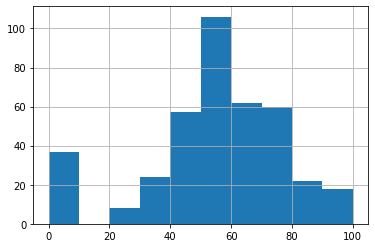

In [69]:
# просматриваем истограмму значений поля score
stud_math.score.hist()
stud_math.score.describe()

Значение поля набранных очков находятся в рамках допустимых (от 0 до 100)

In [51]:
# конвертируем значения полей Fedu, Medu, traveltime, studytime, studytime_granular, failures, famrel, freetime,
# goout, health fields values в строки для отброса их при корреляционном анализе

coded_columns = ['Medu', 'Fedu', 'traveltime', 'studytime', 'studytime_granular',
                 'failures', 'famrel', 'freetime', 'goout', 'health']

# перебираем поля
for col in coded_columns:
    stud_math[col] = stud_math[col].apply(lambda x: str(x))

# просматриваем информацию о датафрецме
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              394 non-null    object 
 1   sex                 394 non-null    object 
 2   age                 394 non-null    int64  
 3   address             394 non-null    object 
 4   famsize             394 non-null    object 
 5   Pstatus             349 non-null    object 
 6   Medu                394 non-null    object 
 7   Fedu                394 non-null    object 
 8   Mjob                394 non-null    object 
 9   Fjob                394 non-null    object 
 10  reason              394 non-null    object 
 11  guardian            394 non-null    object 
 12  traveltime          394 non-null    object 
 13  studytime           394 non-null    object 
 14  failures            394 non-null    object 
 15  schoolsup           394 non-null    object 
 16  famsup  

## 4. Корреляционный анализ количестенных полей. Промежуточные выводы после анализа

In [54]:
# выполняем корреляционый анализ
stud_math.corr()

,age,absences,score
age,1.000000,0.088409,-0.152778
absences,0.088409,1.000000,0.061705
score,-0.152778,0.061705,1.000000


### Выводы о корреляционном анализе

Выполнив корреляционный анализ количественных столбцов, не выявлено линейных зависимостей между значений столбцов.

## 5. Выявление статистической разницы в распределении количества очков по экзамену по математике по номинативным параметрам

In [55]:
# Проверим, есть ли статистические разности в распределении набранных очков по номинативным признакам,
# с помощью теста Стьюдента
for col in stud_math.columns:
    if stud_math[col].dtype == 'object':
        get_stat_dif(stud_math, col, 0.01)

### Выводы выполнив тест Стьюдента

Выполнив поиск статистической разницы в распределении набранных очков по экзамену по математике по номинативным параметрам, не выявлено параметров с статистической разницей в распределении по параметру.

## 6. Выводы

Выполнив анализ, линейной зависимости между количеством очков на экзамене по математике и возрастом, а также количеством пропущенных дней не выявлено. Также не выявлено параметров со статисчической разницей в распределении количества очков по экзамену по математике.<br>
### Поэтому можно делать вывод, что условия жизни не влияют на успеваемость по математике